In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
df = pd.read_csv(
  "dateindex1.csv", 
  parse_dates=['datetime'], 
  index_col="datetime"
)

In [5]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,G,hour,day_of_month,day_of_week,month,year
datetime,,,,,,
2005-01-01 00:00:00,0.0,0,1,5,1,2005
2005-01-01 01:00:00,55.0,1,1,5,1,2005
2005-01-01 02:00:00,41.0,2,1,5,1,2005
2005-01-01 03:00:00,203.0,3,1,5,1,2005
2005-01-01 04:00:00,421.0,4,1,5,1,2005


In [6]:
y = df[['G']]
X= df.drop(columns=['G'])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
history=regressor.fit(X_train, y_train)

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 58.501187971354334
Mean Squared Error: 19500.772081098294
Root Mean Squared Error: 139.64516490411793


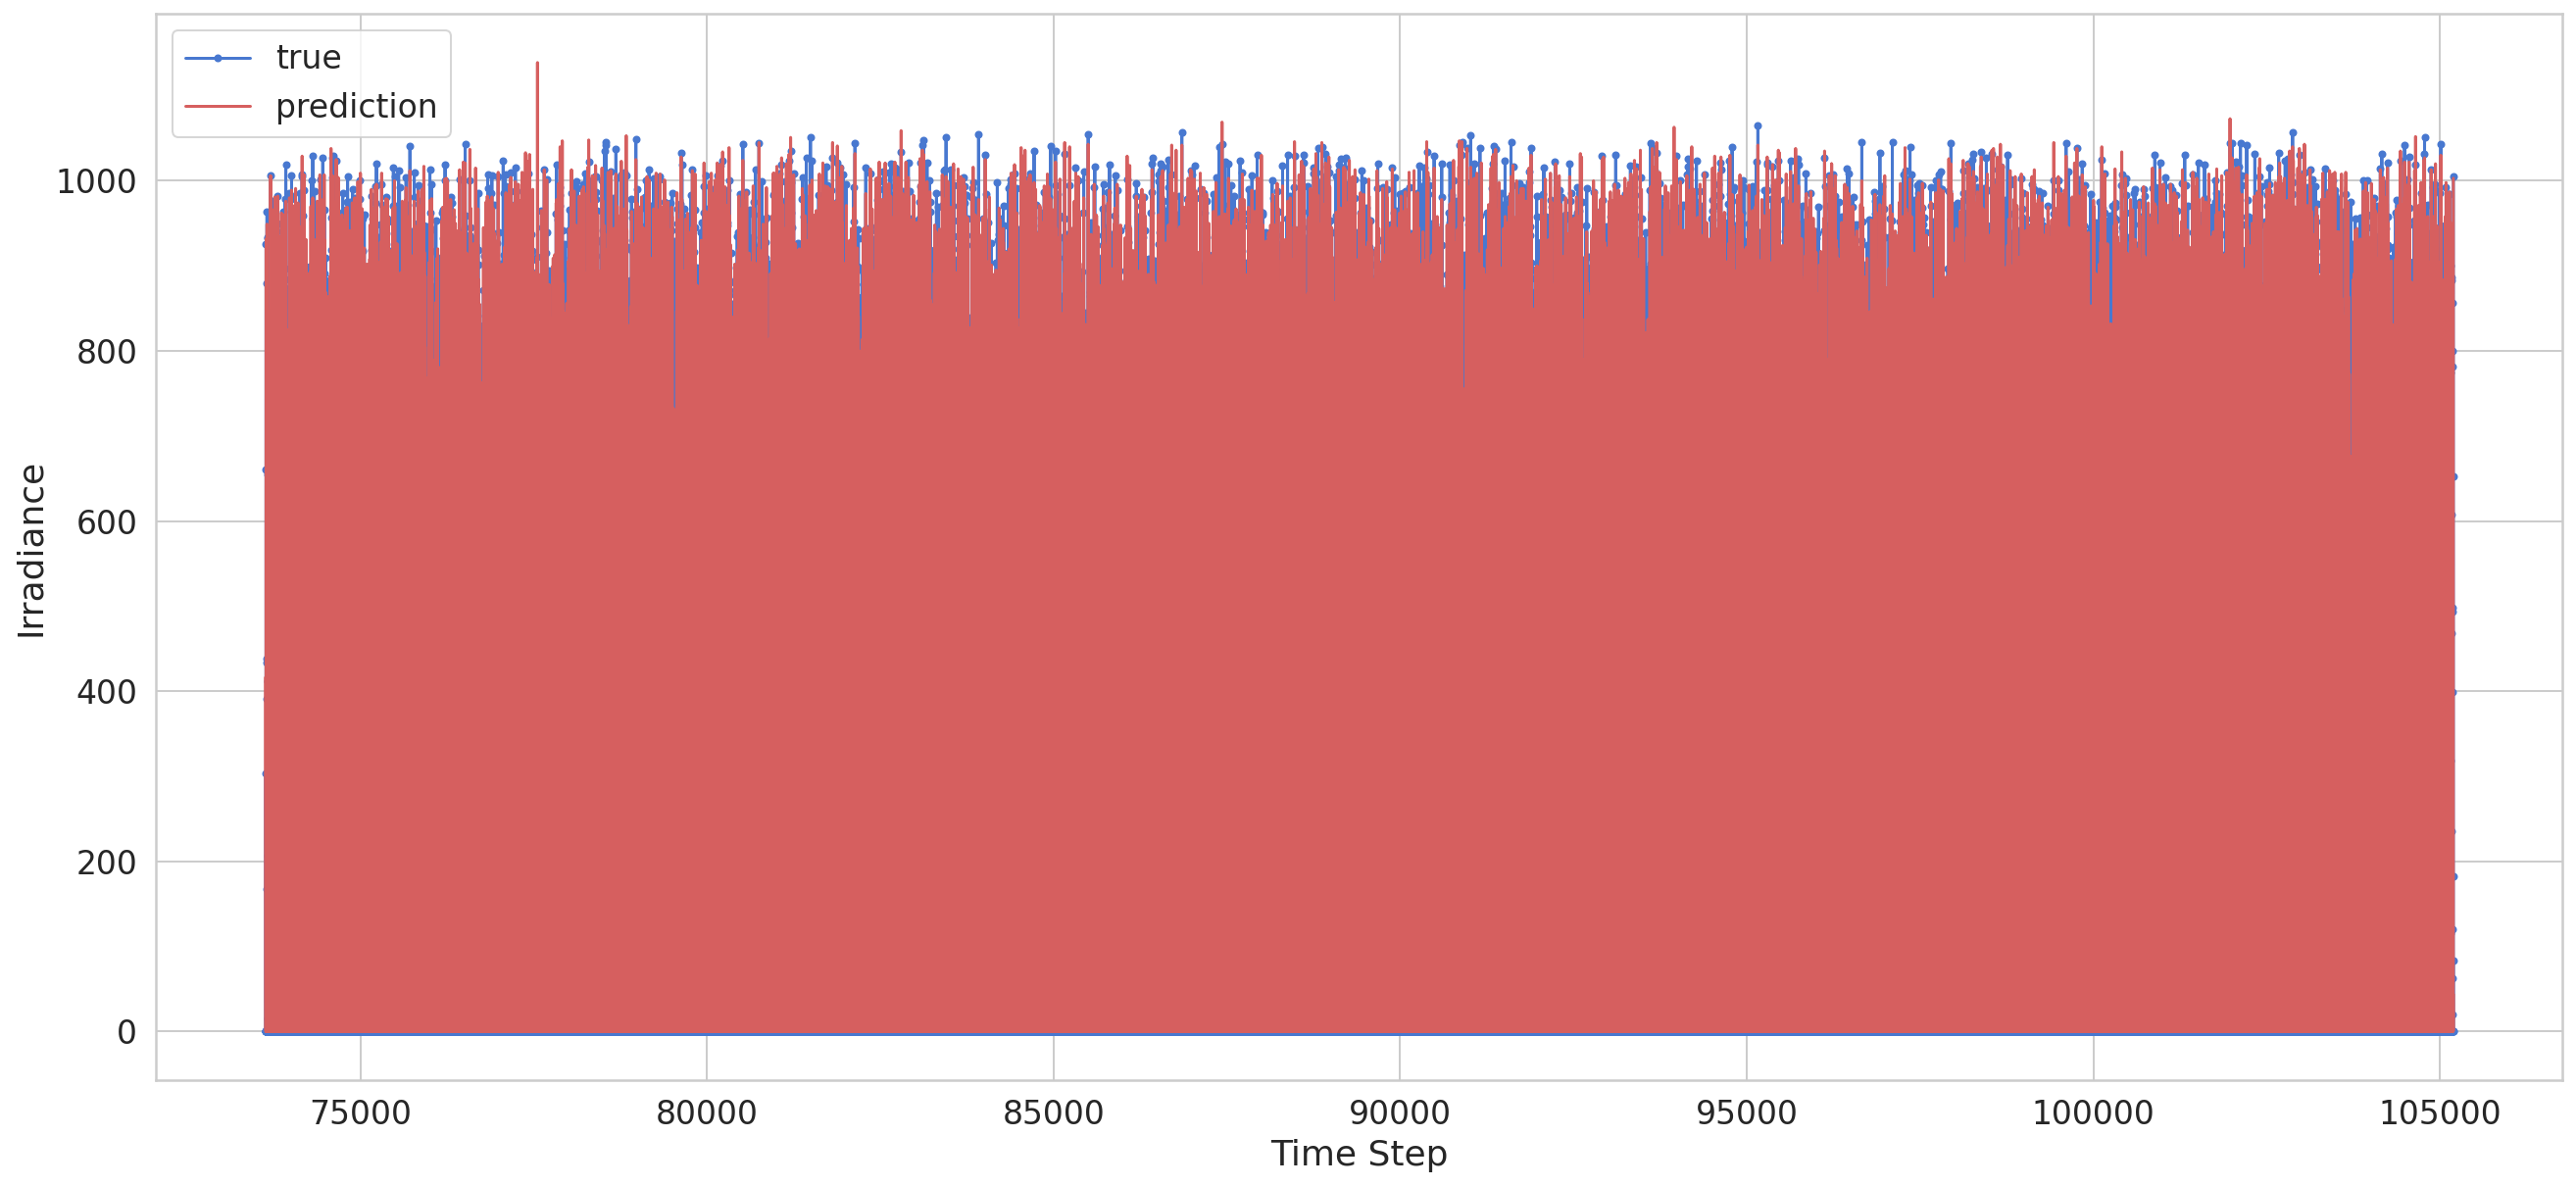

In [11]:
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Irradiance')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [12]:
import pickle
with open('final_decision_Tree_model','wb') as f:
  pickle.dump(regressor,f)

In [13]:
test_data = np.array([  2,	1,	5	,1	,2005])
print(regressor.predict(test_data.reshape(1,5)))

[41.]


In [14]:
X_test.head()

,hour,day_of_month,day_of_week,month,year
datetime,,,,,
2011-06-02 02:00:00,2,2,3,6,2011
2012-03-07 22:00:00,22,7,2,3,2012
2010-05-09 18:00:00,18,9,6,5,2010
2007-09-25 21:00:00,21,25,1,9,2007
2007-04-17 12:00:00,12,17,1,4,2007


In [15]:
y_test.head()

,G
datetime,
2011-06-02 02:00:00,303.0
2012-03-07 22:00:00,0.0
2010-05-09 18:00:00,0.0
2007-09-25 21:00:00,0.0
2007-04-17 12:00:00,0.0


In [18]:
test_data = np.array([  4	,1	,5,	1	,2005])
print(regressor.predict(test_data.reshape(1,5)))

[421.]
